# Spotify Song Popularity Analysis

## Introduction


Hi! I love listening to music on Spotify, so I thought it would be super fun to look at a huge bunch of songs and figure out what makes some of them really popular! In this project, I get to play with lots of song data—like how fast they are, how happy they sound, and who sings them—to see if I can spot any cool patterns. I’m really excited to discover what makes a song a hit!



Importing libraries and printing out first few columns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/dataset.csv')  # Update the path if your file name is different

# Display the first few rows
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Exploring the data now -

In [3]:
# Check the structure
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**Cleaning the Data**
dropping duplicates and handle missing values as needed




In [4]:
df = df.drop_duplicates()
df = df.dropna()

**Exploratory Data Analysis (EDA)**

A. Popularity Distribution

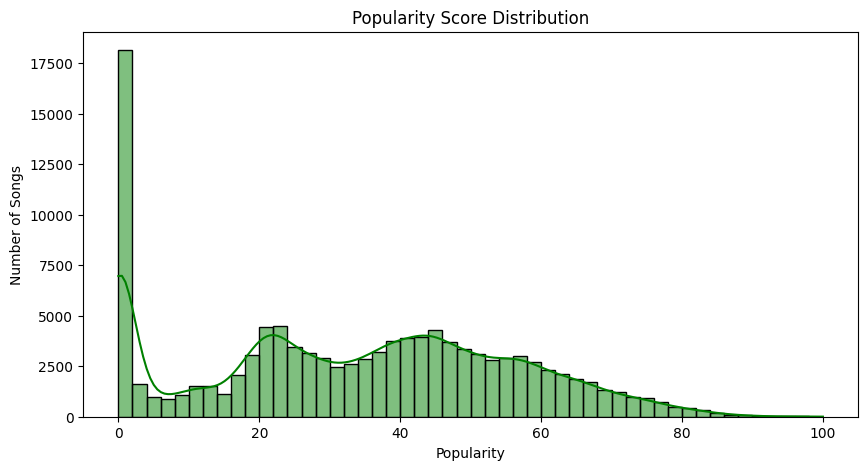

In [14]:


plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=50, kde=True, color='green')
plt.title('Popularity Score Distribution')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()


B. Top and Bottom Songs, Artists, and Genres

In [21]:

top_songs = df.sort_values('popularity', ascending=False).head(10)
display(top_songs[['artists', 'track_name', 'popularity']])

bottom_songs = df.sort_values('popularity', ascending=True).head(10)
display(bottom_songs[['artists', 'track_name', 'popularity']])


,artists,track_name,popularity
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99
88410,Manuel Turizo,La Bachata,98
30003,David Guetta;Bebe Rexha,I'm Good (Blue),98
68303,Manuel Turizo,La Bachata,98
89411,Manuel Turizo,La Bachata,98
81210,David Guetta;Bebe Rexha,I'm Good (Blue),98
67356,Manuel Turizo,La Bachata,98
20008,David Guetta;Bebe Rexha,I'm Good (Blue),98


,artists,track_name,popularity
87240,The Platters,All I Want For Christmas Is My Two Front Teeth,0
87194,The Avett Brothers,Winter In My Heart,0
87195,The Avett Brothers,Winter In My Heart,0
87196,The Avett Brothers,Winter In My Heart,0
87260,Buddy Holly;The Crickets,Everyday,0
87234,The Platters,Winter Wonderland,0
87235,The Platters,Jingle Bell Rock,0
87236,The Platters,All I Want For Christmas Is My Two Front Teeth,0
87238,The Platters,I'll Be Home For Christmas,0
87192,The Avett Brothers,Winter In My Heart,0


Artists with Most Popular Songs

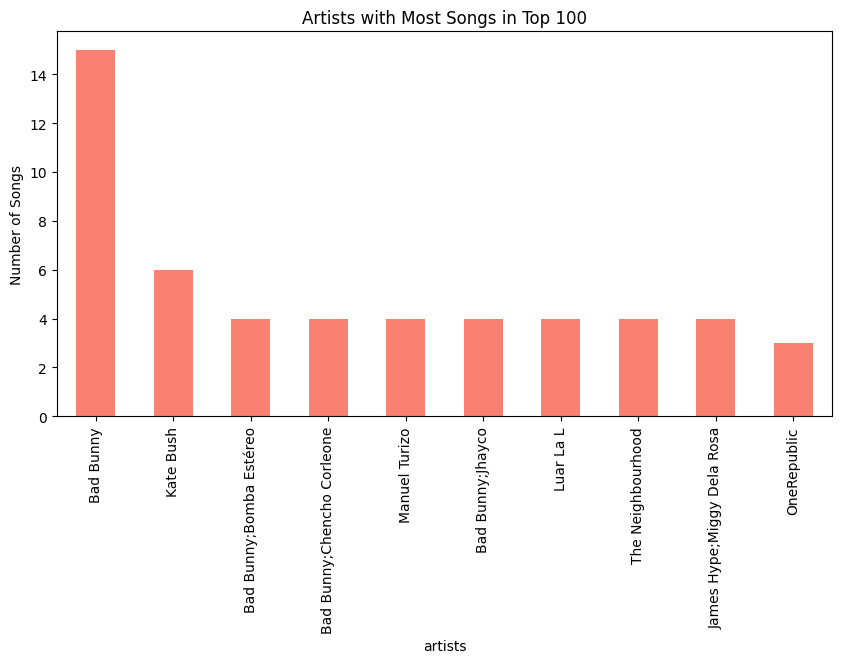

In [20]:

top_100 = df.sort_values('popularity', ascending=False).head(100)
top_artists = top_100['artists'].value_counts().head(10)
top_artists.plot(kind='bar', color='salmon', figsize=(10,5))
plt.title('Artists with Most Songs in Top 100')
plt.ylabel('Number of Songs')
plt.show()




In [ ]:
Feature vs Popularity Relationships

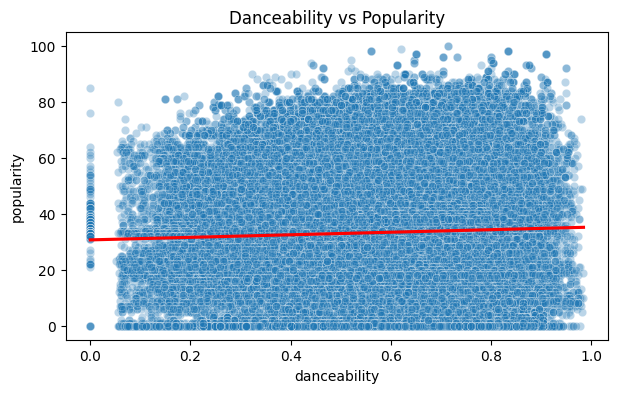

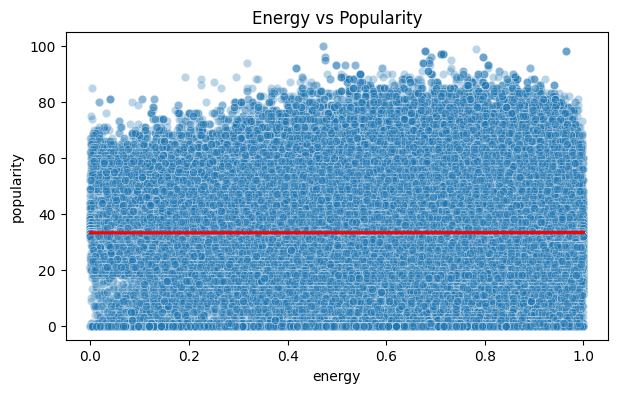

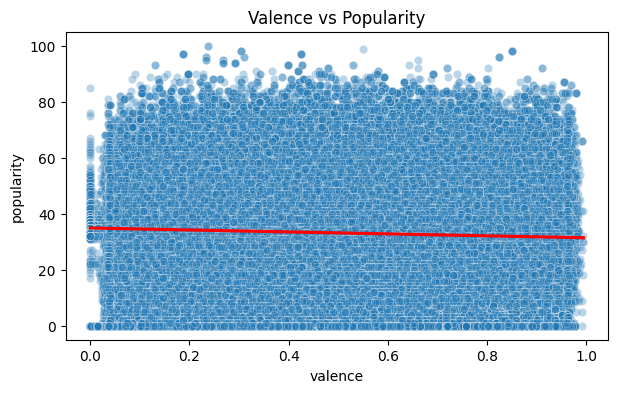

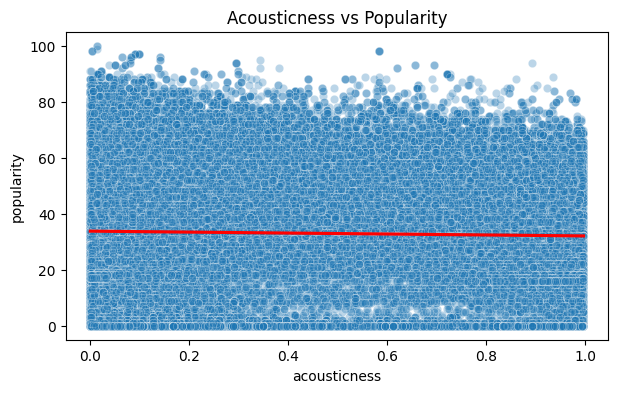

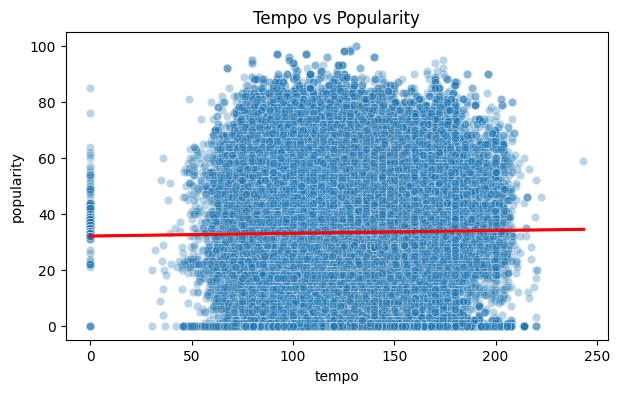

In [25]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']

for feat in features:
    if feat in df.columns:
        plt.figure(figsize=(7,4))
        sns.scatterplot(x=feat, y='popularity', data=df, alpha=0.3)
        sns.regplot(x=feat, y='popularity', data=df, scatter=False, color='red')
        plt.title(f'{feat.capitalize()} vs Popularity')
        plt.show()


In [ ]:
Popularity by song duration

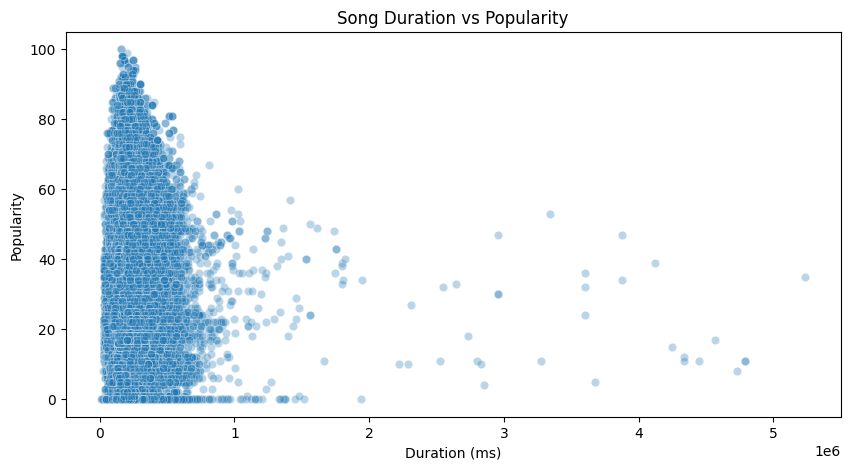

In [26]:
if 'duration_ms' in df.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='duration_ms', y='popularity', data=df, alpha=0.3)
    plt.title('Song Duration vs Popularity')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Popularity')
    plt.show()


#Conclusion
Wow, that was awesome! After looking at all the songs, I found out that popular songs often have more energy and are easier to dance to. Some artists and genres show up a lot in the top songs, too! I had so much fun exploring this and now I feel like a music detective. I can’t wait to do more projects like this and learn even more cool stuff with data!